# Методы машинного обучения. 

## ЛР2. - Проверка гипотезы о математическом ожидании - Две выборки

Сгенерировать две независимые выборки $x_1,…,x_n$ и $y_1,…,y_m$ с нормальные законом распределения и с параметрами  $(a_1,σ_1^2 )$ и $(a_2,σ_2^2 )$  соответствено. Изначально $a_1= a_2$ и $σ_1^2=σ_2^2$. Для полученных выборок предполагаем, что обе дисперсии неизвестны, но они равны между собой.

Осуществить проверку гипотезы $H_0:a_1= a_2$ против альтернативы $a_1≠a_2$.

Производить сдвиг математического ожидания второй выборки $a_2$ на величину $∆=0.1$, вновь генерировать вторую выборку и осуществить проверку гипотезы $H_0:a_1= a_2$ до тех пор, пока гипотеза $H_0$ не будет отвергнута.
    
В результате необходимо:
- вывести на экран гистограммы двух выборок; 
- отобразить в виде графиков динамику изменения значений статистики критерия и P-value для всех итераций проверки гипотезы; 
- рассчитать 95% доверительные интервалы для математических ожиданий двух выборок.


In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Параметры
a = 0
sigma = 1
n = m = 40
delta = 0.1
alpha = 0.05

In [53]:
# Выборки
x = np.random.normal(a, sigma, n)
y = np.random.normal(a, sigma, n)

In [54]:
# Функция проверки гипотезы
def check_hypothesis(x, y, alpha):
    t_stat, p_value = stats.ttest_ind(x, y, equal_var=True)
    return t_stat, p_value, p_value < alpha

In [55]:
t_stats, p_values = [], []
rejected = False

while not rejected:
    t_stat, p_value, rejected = check_hypothesis(x, y, alpha)
    t_stats.append(t_stat)
    p_values.append(p_value)
    if not rejected:
        a += delta
        y = np.random.normal(a, sigma, n)

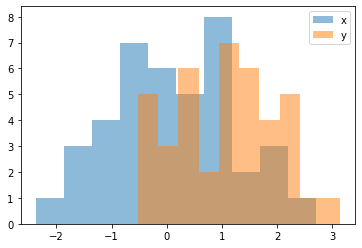

In [56]:
# Гистограммы выборок
plt.hist(x, alpha=0.5, label='x')
plt.hist(y, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

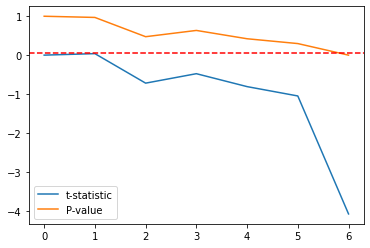

In [57]:
# Графики статистики критерия и P-value
plt.plot(t_stats, label="t-statistic")
plt.plot(p_values, label="P-value")
plt.axhline(alpha, color="red", linestyle="--")
plt.legend()
plt.show()

In [58]:
# Рассчет и вывод 95% доверительных интервалов
conf_int_x = stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=stats.sem(x))
conf_int_y = stats.t.interval(0.95, len(y)-1, loc=np.mean(y), scale=stats.sem(y))

print(f"95% доверительный интервал для x: {conf_int_x}")
print(f"95% доверительный интервал для y: {conf_int_y}")

95% доверительный интервал для x: (-0.23209713518288744, 0.47867737158327706)
95% доверительный интервал для y: (0.7606101688711235, 1.3559502796528369)


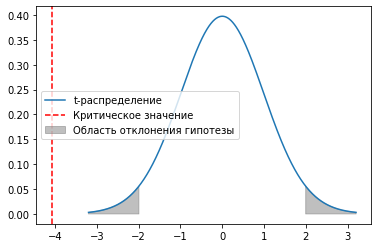

In [59]:
# График т-критерий, плотность, т-распределение
t_dist = np.linspace(stats.t.ppf(0.001, n+m-2), stats.t.ppf(0.999, n+m-2), 1000)
pdf_values = stats.t.pdf(t_dist, n+m-2)

plt.plot(t_dist, pdf_values, label='t-распределение')
plt.axvline(t_stat, color='r', linestyle='--', label='Критическое значение')
plt.fill_between(t_dist, pdf_values, where=((t_dist < stats.t.ppf(alpha/2, n+m-2)) | (t_dist > stats.t.ppf(1 - alpha/2, n+m-2))), color='gray', alpha=0.5, label='Область отклонения гипотезы')
plt.legend()
plt.show()

In [60]:
print(f'Критическое значение t-статистики: {t_stat:.4f}')

Критическое значение t-статистики: -4.0795


In [61]:
# Рассчитываем доверительный интервал для первой выборки
alpha = 0.05  # Уровень доверия
ci_low, ci_high = stats.t.interval(alpha, n-1, loc=np.mean(x), scale=stats.sem(x))
print(f'Доверительный интервал для a1: [{ci_low:.4f}, {ci_high:.4f}]')


Доверительный интервал для a1: [0.1122, 0.1344]


In [62]:
# Рассчитываем доверительный интервал для второй выборки
alpha = 0.05  # Уровень доверия
ci_low, ci_high = stats.t.interval(alpha, m-1, loc=np.mean(y), scale=stats.sem(y))
print(f'Доверительный интервал для a2: [{ci_low:.4f}, {ci_high:.4f}]')

Доверительный интервал для a2: [1.0490, 1.0676]
